### Using Scipy


In [1]:
from scipy.stats import norm,uniform
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps

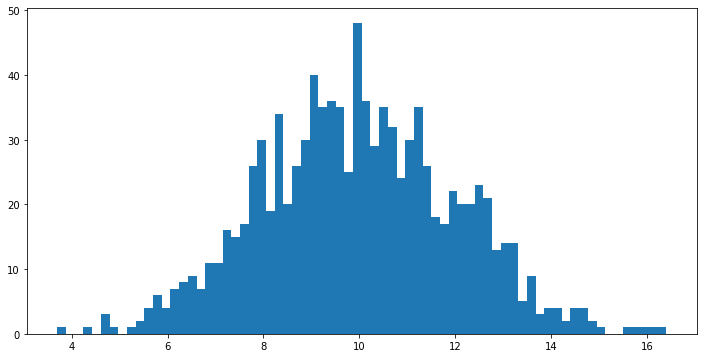

In [2]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.hist(norm.rvs(loc=10,scale=2,size=1000),bins=70);

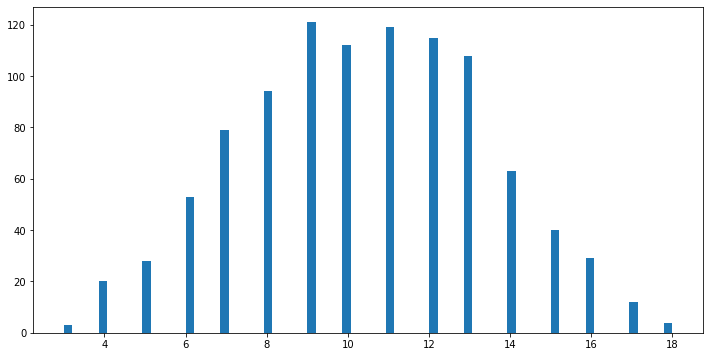

In [3]:

samples= np.ceil(uniform.rvs(loc=0,scale=6,size=(1000,3))).sum(axis=1)
plt.hist(samples,bins=70);

### Rejection sampling

(0.0, 2.0)

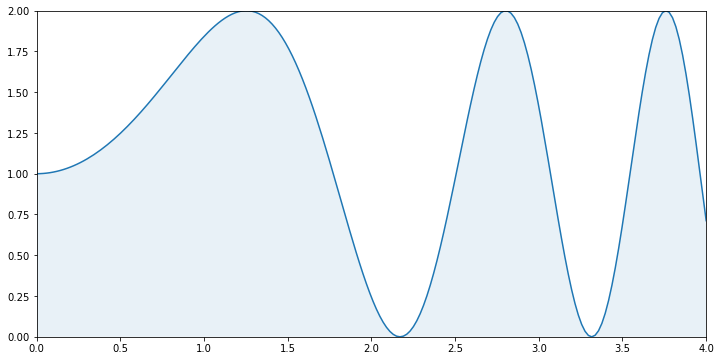

In [4]:
# practising over unnormalised distribution p(x)= sin(x^2)+1 from 0to 4
def pdf(x):
    return np.sin(x**2)+1

xs= np.linspace(0,4,200)
ps=pdf(xs)
plt.plot(xs,ps)
plt.fill_between(xs,0,ps,alpha =0.1)
plt.xlim(0,4)
plt.ylim(0,2)

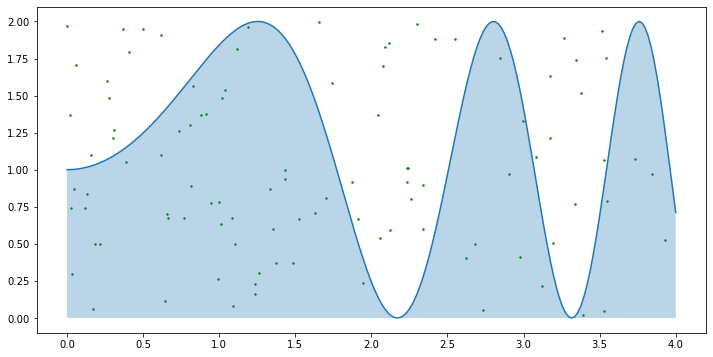

In [5]:
n=100
random_x= uniform.rvs(loc=0,scale=4,size=n)
random_y= uniform.rvs(loc=0,scale=2,size=n)
plt.scatter(random_x,random_y,c='g',s=2)
plt.plot(xs,ps)
plt.fill_between(xs,0,ps,alpha =0.3);

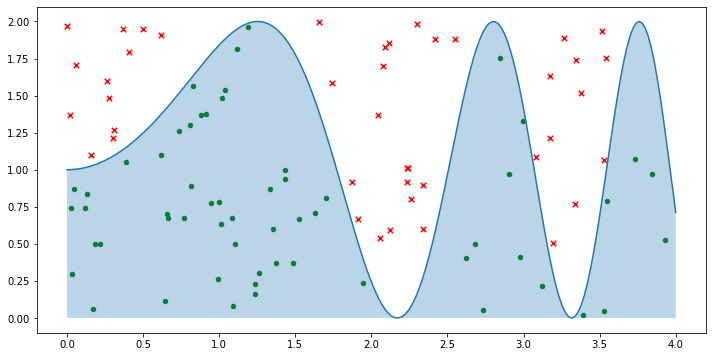

In [6]:
passed = pdf(random_x)>=random_y
plt.scatter(random_x[passed],random_y[passed],c='g',s=20)
plt.scatter(random_x[~passed],random_y[~passed],c='r',s=30,marker='x')
plt.plot(xs,ps)
plt.fill_between(xs,0,ps,alpha =0.3);

59247


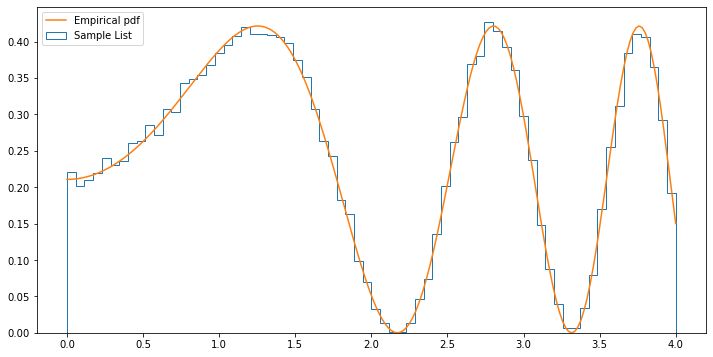

In [7]:
n2=100000
x_test=uniform.rvs(scale=4,size=n2)
x_final=x_test[uniform.rvs(scale=2,size=n2)<=pdf(x_test)]
print(len(x_final))
from scipy.integrate import simps
plt.hist(x_final,density=True,histtype='step',label='Sample List',bins=70);
plt.plot(xs,ps/simps(ps,x=xs),label='Empirical pdf')# Here by normalising we get empirical pdf
plt.legend();

### Inversion sampling


In [8]:
# Lets say the pdf = 3x^2 from 0to 1 , normalised
# CDF= x^3, x here will be (CDF)^(1/3)
def pdf(x):
    return 3*x**2
def cdf(x):
    return x**3
def icdf(cdf):
    return cdf**(1/3)


In [9]:
xs=np.linspace(0,1,100)
pdfs=pdf(xs)
cdfs=cdf(xs)
n=2000
u_samps= uniform.rvs(size= n)
x_samps=icdf(u_samps)

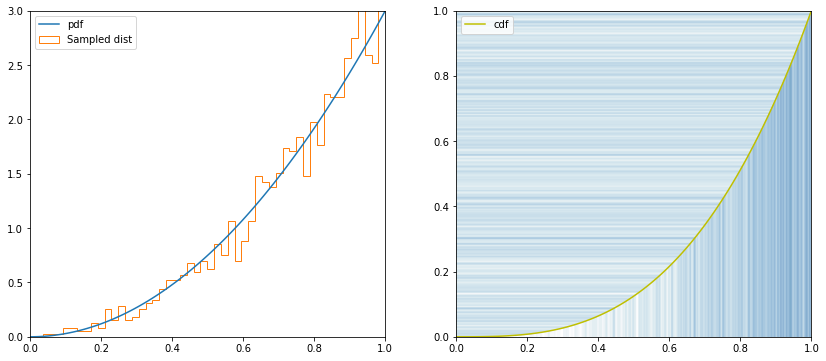

In [13]:
fig,axes= plt.subplots(ncols=2,figsize=(14,6))
axes[0].plot(xs,pdfs,label='pdf')
axes[0].hist(x_samps,density =True,histtype= 'step',label='Sampled dist',bins=50)
axes[1].plot(xs,cdfs,label='cdf',c='y')
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[0].legend(), axes[1].legend()
axes[1].set_xlim(0, 1), axes[1].set_ylim(0, 1);
axes[0].set_xlim(0, 1), axes[0].set_ylim(0, 3);

Of course, we don't actually have to do the maths ourselves! So long as we have the PDF, we can numrically get the CDF and invert it.


In [14]:

#Examples

a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a)
#np.cumsum(a, dtype=float)     # specifies type of output value(s)


array([ 1,  3,  6, 10, 15, 21], dtype=int32)

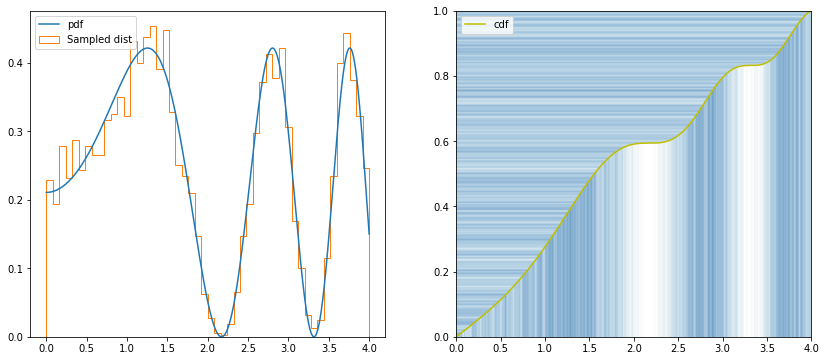

In [15]:
def pdf(x):
    return np.sin(x**2)+1

from scipy.interpolate import interp1d
xs=np.linspace(0,4,10000)
pdfs=pdf(xs)
cdfs =pdfs.cumsum()/pdfs.sum() # this method is dangerou

n=4000
u_samps= uniform.rvs(size= n)
x_samps=interp1d(cdfs,xs)(u_samps)
#print(simps(pdfs,x=xs))
fig,axes= plt.subplots(ncols=2,figsize=(14,6))
axes[0].plot(xs,pdfs/simps(pdfs,x=xs),label='pdf')
axes[0].hist(x_samps,density =True,histtype= 'step',label='Sampled dist',bins=50)
axes[1].plot(xs,cdfs,label='cdf',c='y')
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(x_samps, 0, u_samps, linewidth=0.1, alpha=0.3)
axes[0].legend(), axes[1].legend()
axes[1].set_xlim(0, 4), axes[1].set_ylim(0, 1);
